In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

### 1 Plot the image rotated by a) +45◦, b) −225◦, c) an angle of your choice.

In [2]:
def rot(x):
    angle = x/180*np.pi
    matrix = np.matrix([[np.cos(angle), -np.sin(angle)],[np.sin(angle), np.cos(angle)]])
    return matrix

In [3]:
A = np.matrix('0 0; 0 1; 0.5 0.5')
A

matrix([[ 0. ,  0. ],
        [ 0. ,  1. ],
        [ 0.5,  0.5]])

In [4]:
A @ rot(45)

matrix([[  0.00000000e+00,   0.00000000e+00],
        [  7.07106781e-01,   7.07106781e-01],
        [  7.07106781e-01,   5.55111512e-17]])

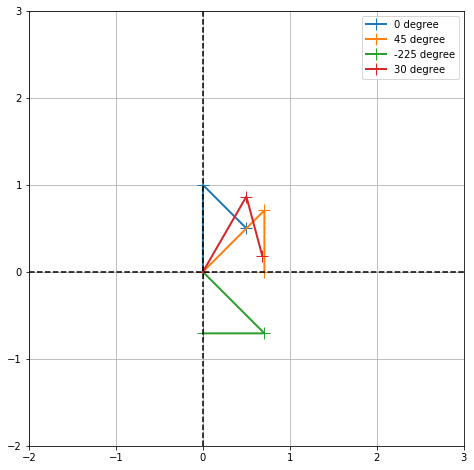

In [5]:
def plotFigure_rot(AList):
    
    
    plt.figure(figsize = (8,8))
    plt.grid(b=True)
    min_limit = np.min(AList[0]) - np.max(AList[0])*2.0
    max_limit = np.max(AList[0]) + np.max(AList[0])*2.0

    plt.axes().set_xlim((min_limit, max_limit))
    plt.axes().set_ylim((min_limit, max_limit))
    anglelist = [0, 45, -225, 30]
    
    plt.axes().set_aspect('equal')
    for A in range(len(AList)):
        plt.plot(AList[A][:, 0], AList[A][:,1], 
                 '+-', linewidth = 2, markersize = 12, 
                 label = str(anglelist[A]) + ' degree')

    plt.axhline(0, color='black', linestyle = 'dashed')
    plt.axvline(0, color='black',linestyle = 'dashed')
    plt.legend()


plotFigure_rot([A, np.dot(A, rot(45)), A @ rot(-225), A@rot(30)])

### 2. Create a new simple object of your choice.

2. Create a new simple object of your choice. The object should be asymmetric. Print this matrix.

3. Show the object (rotation 0) and a few rotated images of that object. Ensure you keep the correct aspect ratio for the axes!

In [6]:
AS = np.matrix('0 0; 0 1; 1 0; 0 0; -1 0; 0 -1; 0 0')
AS

matrix([[ 0,  0],
        [ 0,  1],
        [ 1,  0],
        [ 0,  0],
        [-1,  0],
        [ 0, -1],
        [ 0,  0]])

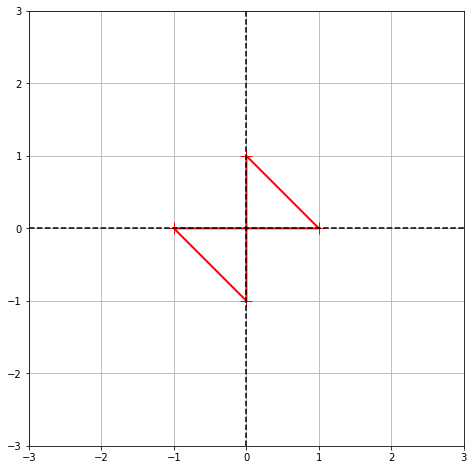

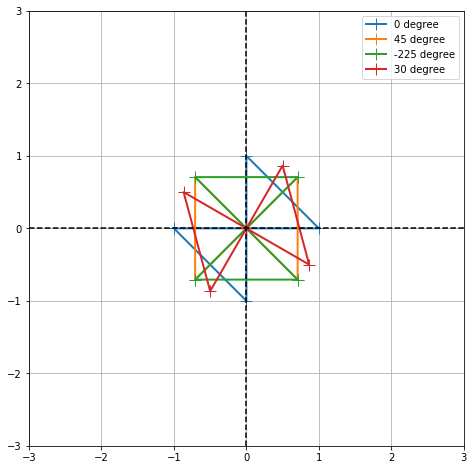

In [7]:
def plotFigure(A):
    plt.figure(figsize=(8,8))
    # set figure size
    plt.grid(b=True)
    # show grid
    min_limit = np.min(A) - np.max(A)*2.0
    max_limit = np.max(A) + np.max(A)*2.0
    plt.axes().set_xlim((min_limit, max_limit))
    plt.axes().set_ylim((min_limit, max_limit))
    # set limits (not the best ones but good enough)
    plt.axes().set_aspect('equal')
    # ensure units are equal along the axes
    plt.plot(A[:,0], A[:,1], 'r+-', markersize = 12, linewidth = 2)
    # plot x, y
    plt.axhline(0, color='black', linestyle = 'dashed')
    plt.axvline(0, color='black',linestyle = 'dashed')
    # draw the axes


plotFigure(AS)
plotFigure_rot([AS, np.dot(AS, rot(45)), AS @ rot(-225), AS@rot(30)])

### 4. Load in the Crazy Hat's image data from file  `crazy_hat.tsv. Print the data.

It contains three variables: x and y are coordinates, and group is the line group: points belonging of the same group should be connected, groups belonging to di erent groups should not be connected. (Hence you have to repeat the plotting, plt.plot, for each group inside of the same image).

In [8]:
A = pd.read_csv('crazy_hat.tsv', delimiter='\t')
A

,x,y,group
0,0,22,outline
1,16,-18,outline
2,-16,-18,outline
3,0,22,outline
4,-3,7,leye
5,-3,14,leye
6,2,7,reye
7,2,14,reye
8,-11,-10,mouth
9,-7,-17,mouth


In [9]:
def plot_crazy_hat(AList):
    
    
    plt.figure(figsize=(8,8))
    # set figure size
    plt.grid(b=True)

    min_limit = np.min(AList[0]['x']) - np.max(AList[0]['x'])
    max_limit = np.max(AList[0]['y']) + np.max(AList[0]['y'])
    plt.axes().set_xlim((min_limit, max_limit))
    plt.axes().set_ylim((min_limit, max_limit))
    # set limits
    
    plt.axes().set_aspect('equal')
    # ensure units are equal along the axes
    for A in AList:
        outline = A[A['group'] == 'outline']
        reye = A[A['group'] == 'reye']
        leye = A[A['group'] == 'leye']
        mouth = A[A['group'] == 'mouth']

        draw = [outline,reye, leye,mouth]

        for i in range(len(draw)):
            plt.plot(draw[i]['x'], draw[i]['y'], 'b-', linewidth = 2)


5. Plot Crazy Hat, and a few rotated images of it. Ensure the correct lines are connected.

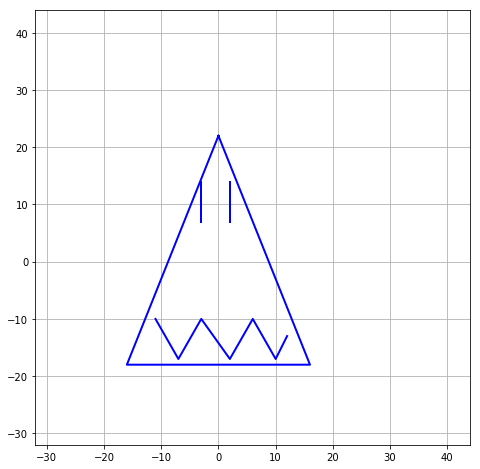

In [10]:
plot_crazy_hat([A])

In [11]:
def rot_crazy_hat(hat, a):
    
    rotate = rot(a)
    x= np.array(A[['x','y']]@rotate[:,0]).flatten()
    y = np.array(A[['x','y']]@rotate[:,1]).flatten()
    hat_rot = pd.DataFrame({'x':x, 'y':y, 'group':hat['group']})
    return hat_rot

#### 5. Rotated Hats

In [12]:
angles = [45, 90, 180]

In [13]:
rot_hats = [rot_crazy_hat(A,i) for i in angles]

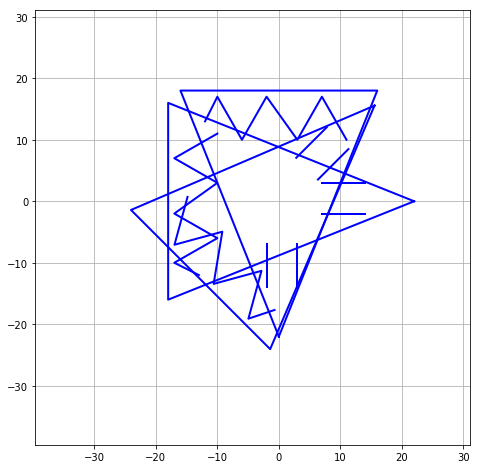

In [14]:
plot_crazy_hat(rot_hats)

#### 6. Flipped hat
Previously we only discussed rotation. Now create the  ip-X-matrix Fx that  ips the image around
x-axis. Demonstrate how it works.

In [15]:
A_flip = pd.DataFrame({'x': -A['x'], 'y': A['y'], 'group': A['group']})

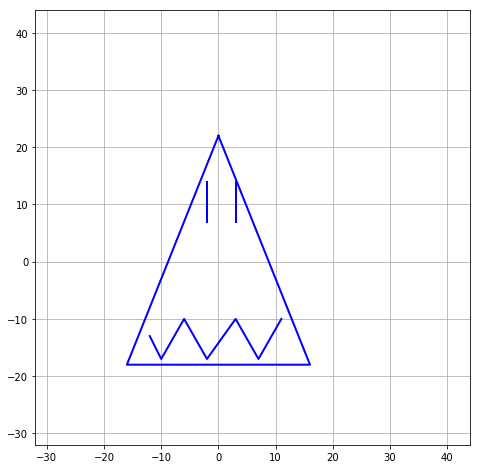

In [16]:
plot_crazy_hat([A_flip])

#### 7.  Streches 
Construct matrix  stretchy  that stretches the image alon y-axis by a given amount. Show how it
works.

In [17]:
A_Stretch = pd.DataFrame({'x': A['x'], 'y': A['y']*1.5, 'group': A['group']})

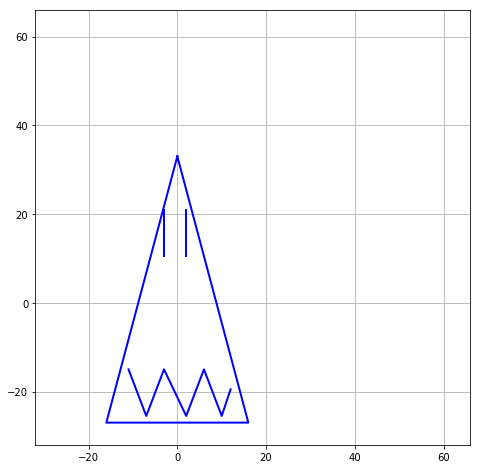

In [18]:
plot_crazy_hat([A_Stretch])

#### 8. Combine rotations
fips and stretches to modify the Crazy Hat image in a more creative way.

In [19]:
A_rotate = rot_crazy_hat(A,45)

In [20]:
A_rotate_flip_stretch = pd.DataFrame({'x': A_rotate['x'], 'y': A_rotate['y']*1.5, 'group': A_rotate['group']})

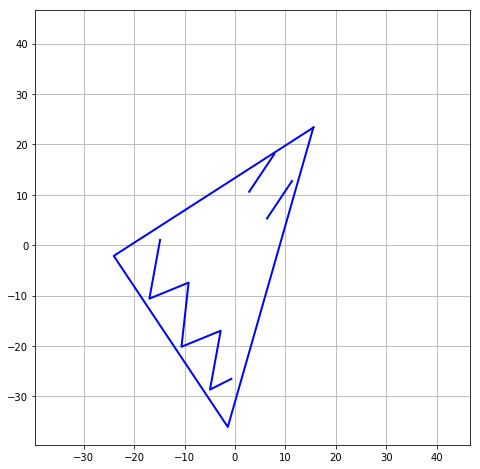

In [21]:
plot_crazy_hat([A_rotate_flip_stretch])